# Prediksi Kalori Berdasarkan Durasi Latihan Anggota Gym
Proyek ini menggunakan regresi linear sederhana untuk memprediksi jumlah kalori yang terbakar berdasarkan lama latihan.


# Import Library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Memuat dataset dari file CSV

In [14]:
df = pd.read_csv("gym_members_exercise_tracking.csv")

# Menampilkan 5 baris pertama
print("=== 5 Baris Pertama ===")
print(df.head())

# Cek nama kolom
print("\n=== Nama Kolom ===")
print(df.columns)

=== 5 Baris Pertama ===
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_

# Cek Informasi Dataset

In [20]:
# Melihat tipe data dan missing values
print("=== Info Dataset ===")
print(df.info())

# Cek jumlah data hilang
print("\n=== Jumlah Missing Values ===")
print(df.isnull().sum())


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)

# Variabel independen (X) dan dependen (y)

In [22]:
X = df[['Session_Duration (hours)']]  
y = df['Calories_Burned']

print("Contoh nilai X:\n", X.head())
print("\nContoh nilai y:\n", y.head())

Contoh nilai X:
    Session_Duration (hours)
0                      1.69
1                      1.30
2                      1.11
3                      0.59
4                      0.64

Contoh nilai y:
 0    1313
1     883
2     677
3     532
4     556
Name: Calories_Burned, dtype: int64


# Scatterplot (Validasi Linearitas)

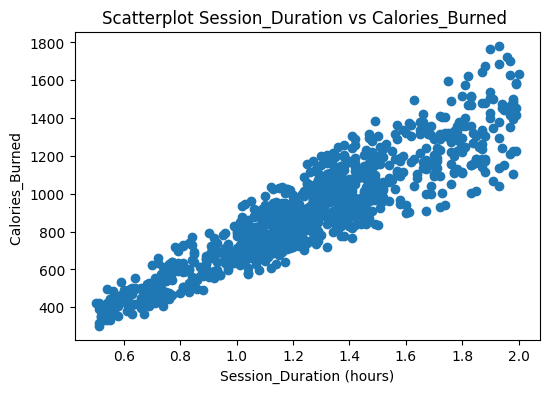

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(X, y)
plt.xlabel("Session_Duration (hours)")
plt.ylabel("Calories_Burned ")
plt.title("Scatterplot Session_Duration vs Calories_Burned ")
plt.show()

# Cek ringkasan statistik

In [24]:
# Ambil hanya kolom yang relevan
df_filtered = df[['Session_Duration (hours)', 'Calories_Burned']].copy()

# Hitung IQR
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

# Filter outlier berdasarkan IQR
condition = ~(
    (df_filtered < (Q1 - 1.5 * IQR)) |
    (df_filtered > (Q3 + 1.5 * IQR))
).any(axis=1)

filtered_df = df[condition]

print("Jumlah data awal :", len(df))
print("Jumlah setelah filter:", len(filtered_df))

# Update variabel untuk modeling
df = filtered_df
X = df[['Session_Duration (hours)']]
y = df['Calories_Burned']

Jumlah data awal : 973
Jumlah setelah filter: 963


# Split Data (Train & Test)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 770
Jumlah data test: 193


# Training Model

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model berhasil dilatih.")
print("Intercept  :", model.intercept_)
print("Koefisien :", model.coef_[0])

Model berhasil dilatih.
Intercept  : 24.55585221833519
Koefisien : 697.5699141751671


# Evaluasi Model

In [27]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluasi Model ===")
print("R-squared :", r2)
print("RMSE      :", rmse)

=== Evaluasi Model ===
R-squared : 0.8312294819661906
RMSE      : 111.08425601216787


# Visualisasi Garis Regresi

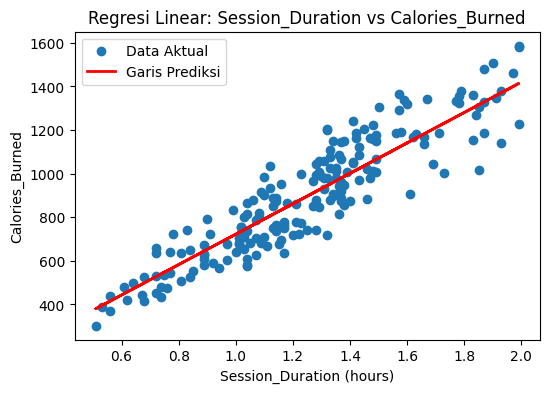

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Data Aktual")
plt.plot(X_test, y_pred, color="red", label="Garis Prediksi", linewidth=2)
plt.xlabel("Session_Duration (hours)")
plt.ylabel("Calories_Burned")
plt.title("Regresi Linear: Session_Duration vs Calories_Burned")
plt.legend()
plt.show()

# Simpan Model

In [36]:
joblib.dump(model, "model_Calories_Burned.pkl")
print("Model disimpan sebagai model_heart_rate.pkl")

Model disimpan sebagai model_heart_rate.pkl


# Histogram Distribusi Heart Rate (Y)

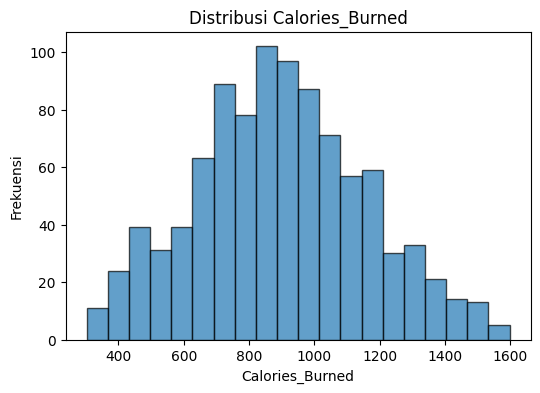

In [37]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Calories_Burned")
plt.xlabel("Calories_Burned")
plt.ylabel("Frekuensi")
plt.show()

# Histogram Distribusi Duration (X)

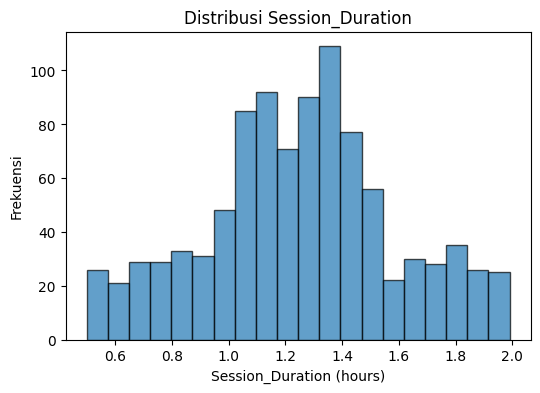

In [38]:
plt.figure(figsize=(6,4))
plt.hist(X, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Session_Duration")
plt.xlabel("Session_Duration (hours)")
plt.ylabel("Frekuensi")
plt.show()

# Residual Plot (Error Visual)

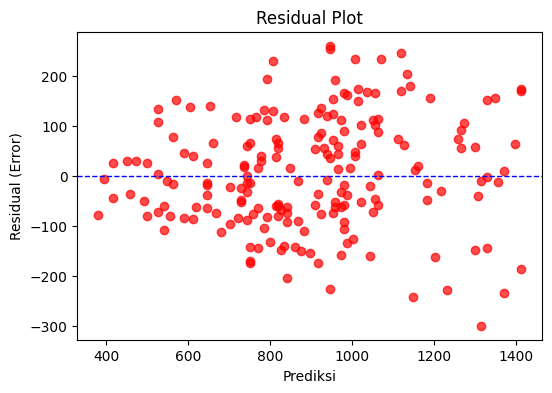

In [39]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7, color="red")  # titik residual merah
plt.axhline(0, color="blue", linestyle="--", linewidth=1)  # garis acuan hitam biar kontras
plt.title("Residual Plot")
plt.xlabel("Prediksi")
plt.ylabel("Residual (Error)")
plt.show()

# Heatmap Korelasi

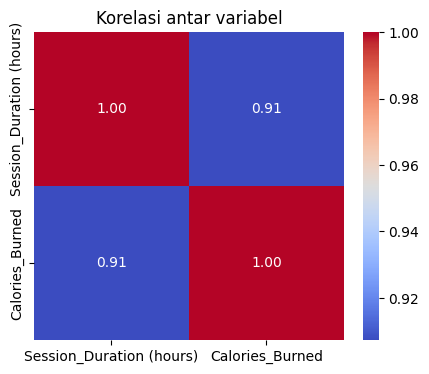

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(df[['Session_Duration (hours)', 'Calories_Burned']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel")
plt.show()